In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import numba
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [5]:
df=pd.read_csv(r'C:\Users\Administrator\Downloads\Mall_Customers - Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

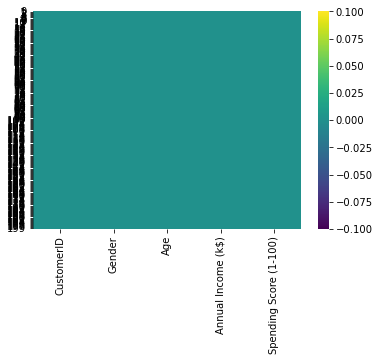

In [23]:
sns.heatmap(df.isnull(), yticklabels=True, cmap='viridis')

# Null value count

In [25]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

Text(0, 0.5, 'Count')

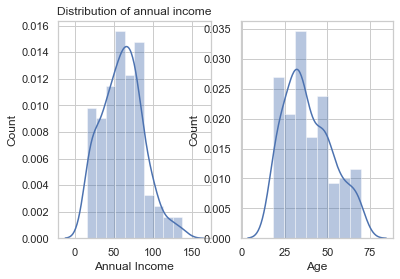

In [37]:
import warnings
warnings.filterwarnings ('ignore')
plt.subplot (1,2,1)
sns.set(style='whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of annual income')
plt.xlabel('Annual Income')
plt.ylabel('Count')

plt.subplot (1,2,2)
sns.set(style='whitegrid')
sns.distplot (df[ 'Age'])
plt.xlabel('Age')
plt.ylabel('Count')

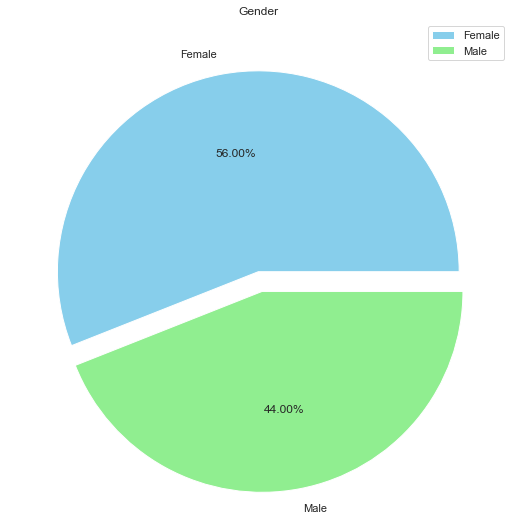

In [39]:
labels=['Female', 'Male']
size=df['Gender'].value_counts()
colors=['skyblue', 'lightgreen']
explode=[0,0.1]
plt.figure(figsize=(9, 10))
plt.pie(x=size, colors=colors, labels=labels, explode=explode, autopct='%0.2f%%')
plt.title('Gender')
plt.legend()
plt.show()

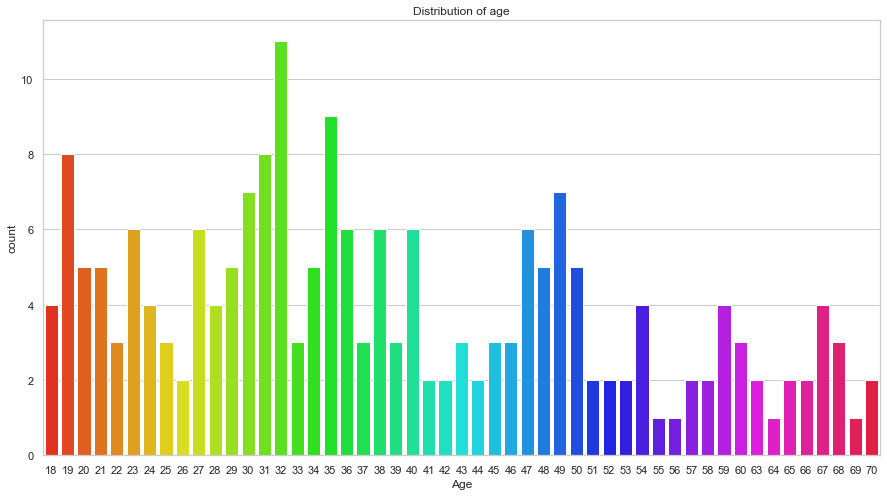

In [40]:
plt.figure(figsize=(15, 8))
sns.countplot(df['Age'], palette='hsv')
plt.title('Distribution of age')
plt.show()

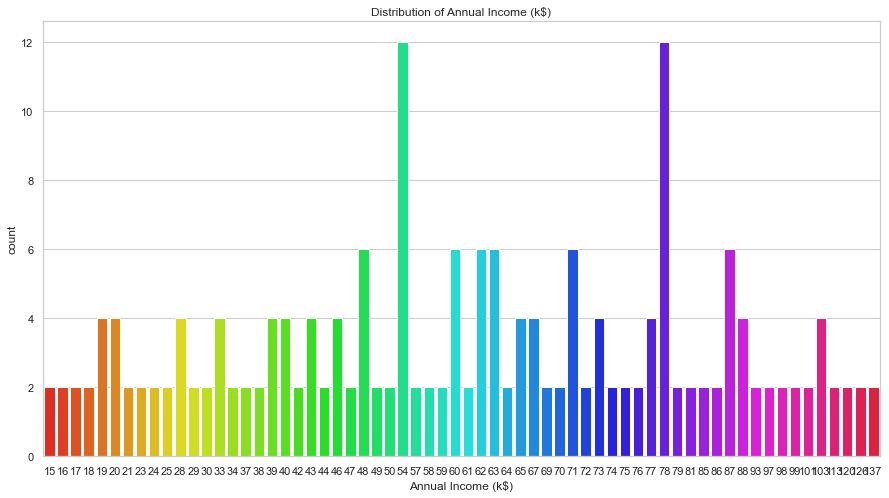

In [47]:
plt.figure(figsize=(15, 8))
sns.countplot(df['Annual Income (k$)'], palette='hsv')
plt.title('Distribution of Annual Income (k$)')
plt.show()

# Ready for splitting

In [17]:
x_train, x_test , y_train , y_test =train_test_split(x,y,test_size=0.3,random_state=30)

In [18]:
LR = LinearRegression()

In [19]:
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
score=r2_score(y_test,y_pred)
score

0.31542294723640857

# Clustering

In [41]:
x=df.iloc[:,[3,4]].values
print(x.shape)

(200, 2)


In [42]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Elbow method

In [43]:
from sklearn.cluster import KMeans

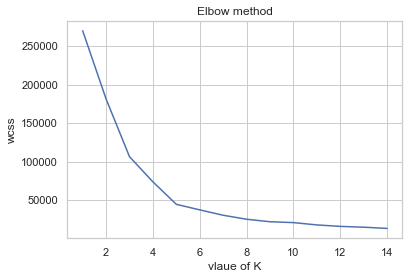

In [46]:
wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i ,init = 'k-means++',
             max_iter=300 , n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.title('Elbow method')
plt.xlabel('vlaue of K')
plt.ylabel('wcss')
plt.show()

# kmean visualization

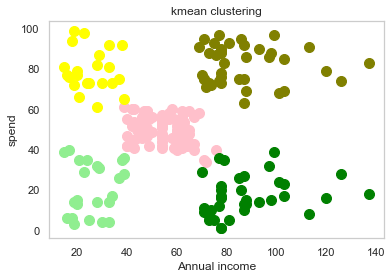

In [51]:
km=KMeans(n_clusters=5,init='k-means++',max_iter=300)
ymean=km.fit_predict(x)
plt.scatter(x[ymean==0,0],x[ymean==0,1],
           s=100,c='pink',label='miser')
plt.scatter(x[ymean==1,0],x[ymean==1,1],
           s=100,c='olive',label='general')
plt.scatter(x[ymean==2,0],x[ymean==2,1],
           s=100,c='yellow',label='target')
plt.scatter(x[ymean==3,0],x[ymean==3,1],
           s=100,c='lightgreen',label='spendmachine')
plt.scatter(x[ymean==4,0],x[ymean==4,1],
           s=100,c='green',label='careful')
plt.title("kmean clustering")
plt.xlabel("Annual income")
plt.ylabel("spend")
plt.grid()
plt.show()